<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

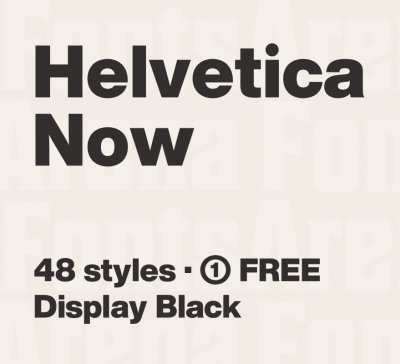

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

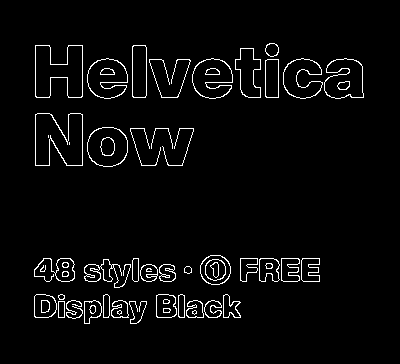

In [0]:
cv2_imshow(edges)

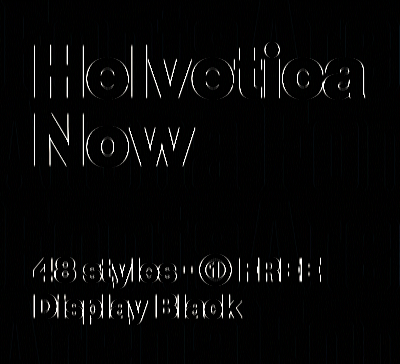

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

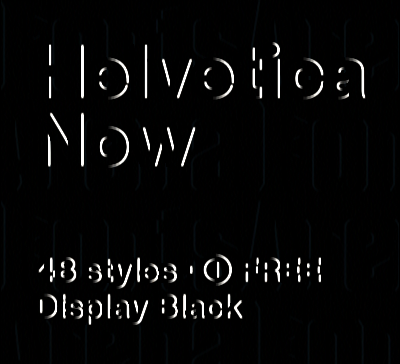

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Horizontal Edge Detector

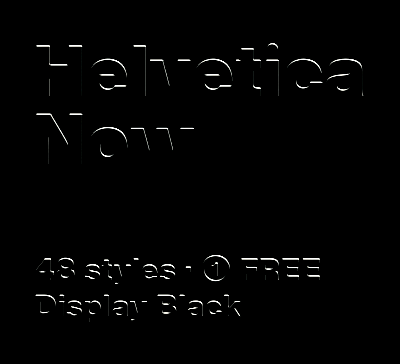

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,1],[-1,-2,1],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

45 angle edge detection

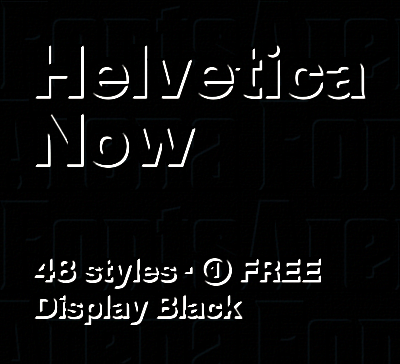

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Shapen the image

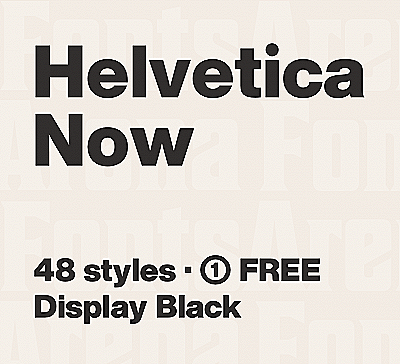

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Blur Kernel

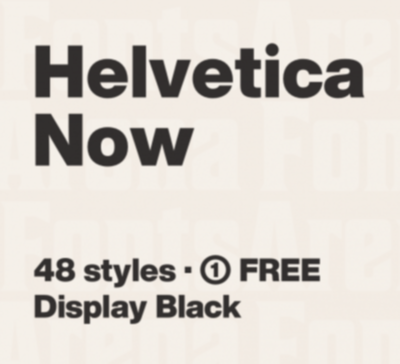

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Identity function

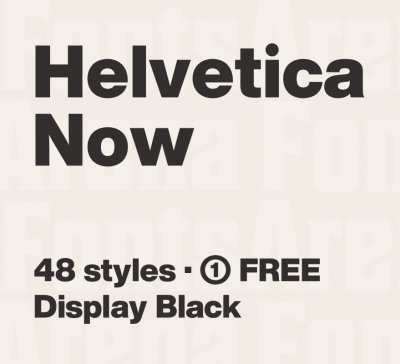

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)